# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=60)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=60)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 51


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | minas de marcona
Processing Record 2 of Set 1 | oarai
Processing Record 3 of Set 1 | kutum
Processing Record 4 of Set 1 | horta
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | zaki biam
Processing Record 9 of Set 1 | egilsstadir
Processing Record 10 of Set 1 | suva
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | bac lieu
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | naduvattam
Processing Record 18 of Set 1 | zeya
Processing Record 19 of Set 1 | qasr-e qand
City not found. Skipping...
Processing Record 20 of Set 1 | kaa-khem
Processing Record 21 of Set 1 |

In [44]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          46
Lat           46
Lng           46
Max Temp      46
Humidity      46
Cloudiness    46
Wind Speed    46
Country       46
Date          46
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,minas de marcona,-15.2119,-75.1103,17.39,57,61,3.81,PE,1718052580
1,oarai,36.3167,140.6000,19.08,85,55,1.24,JP,1718052581
2,kutum,14.2000,24.6667,26.26,50,100,6.59,SD,1718052344
3,horta,38.5333,-28.6333,20.01,79,40,3.60,PT,1718052345
4,edinburgh of the seven seas,-37.0676,-12.3116,14.43,75,16,9.88,SH,1718052582


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,minas de marcona,-15.2119,-75.1103,17.39,57,61,3.81,PE,1718052580
1,oarai,36.3167,140.6000,19.08,85,55,1.24,JP,1718052581
2,kutum,14.2000,24.6667,26.26,50,100,6.59,SD,1718052344
3,horta,38.5333,-28.6333,20.01,79,40,3.60,PT,1718052345
4,edinburgh of the seven seas,-37.0676,-12.3116,14.43,75,16,9.88,SH,1718052582


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

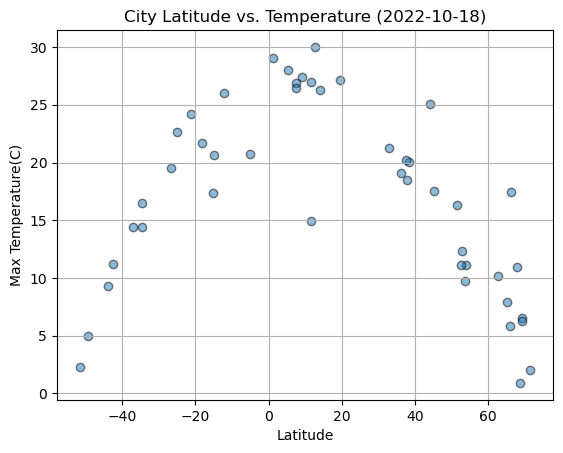

In [89]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df["Max Temp"],marker = 'o', 
            alpha=.5,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

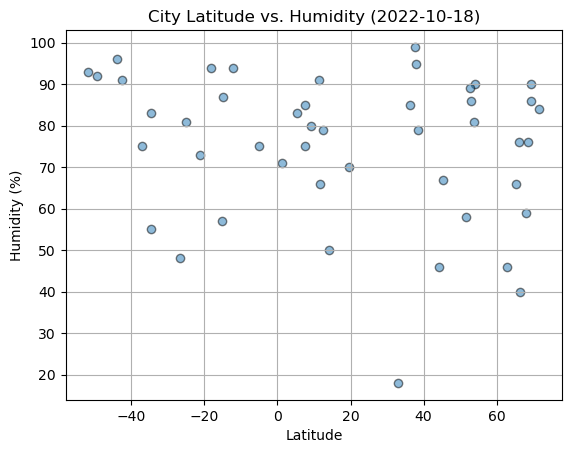

In [93]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df["Humidity"],marker = 'o', alpha=.5,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

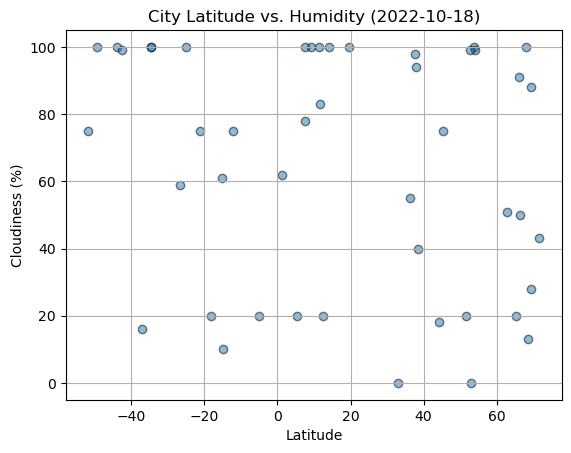

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df["Cloudiness"],
            marker = 'o', alpha=.5,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

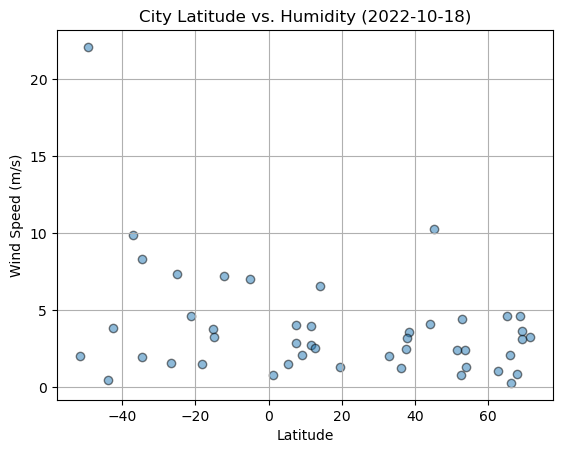

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df["Wind Speed"],marker = 'o', alpha=.5,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,x_c=.1,y_c=.9):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xy=(x_c,y_c), xycoords='axes fraction', fontsize=15, color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,oarai,36.3167,140.6000,19.08,85,55,1.24,JP,1718052581
2,kutum,14.2000,24.6667,26.26,50,100,6.59,SD,1718052344
3,horta,38.5333,-28.6333,20.01,79,40,3.60,PT,1718052345
5,tiksi,71.6872,128.8694,2.06,84,43,3.27,RU,1718052345
6,bilibino,68.0546,166.4372,10.93,59,100,0.89,RU,1718052583


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,minas de marcona,-15.2119,-75.1103,17.39,57,61,3.81,PE,1718052580
4,edinburgh of the seven seas,-37.0676,-12.3116,14.43,75,16,9.88,SH,1718052582
9,suva,-18.1416,178.4415,21.71,94,20,1.54,FJ,1718052347
12,bredasdorp,-34.5322,20.0403,14.39,55,100,1.97,ZA,1718052585
14,waitangi,-43.9535,-176.5597,9.34,96,100,0.45,NZ,1718052586


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.79635724849193


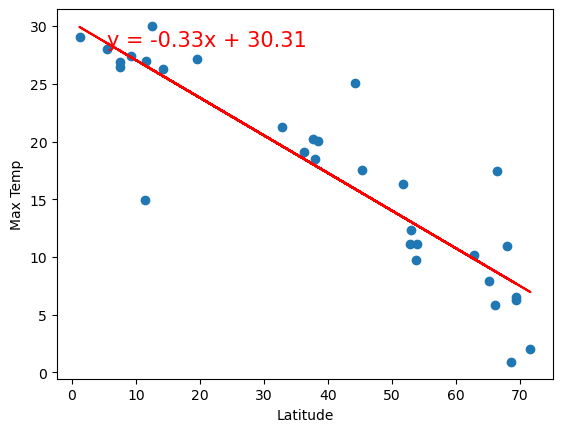

In [71]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
northern_hemi_equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r-value is: 0.7804964521918497


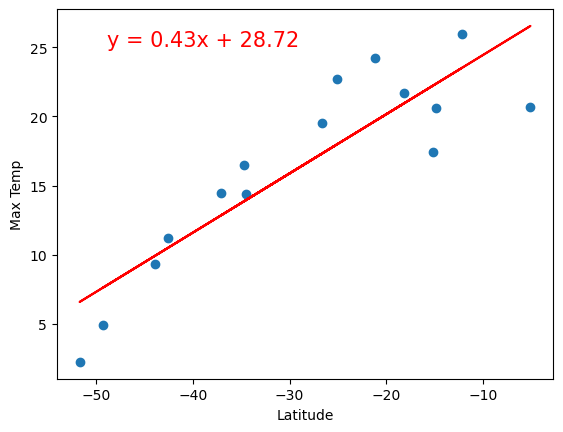

In [75]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
southern_hemi_equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** There is a confident, strong correlation between latitude and temperature in both northern and southern hemispheres, as the closer you move to the equator the warmer temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0036455849060994154


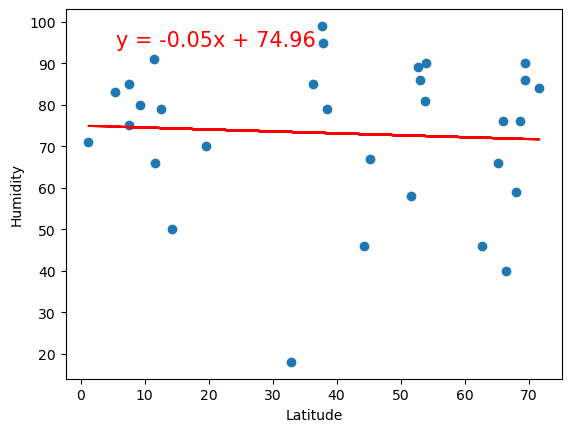

In [77]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
northern_hemi_equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r-value is: 0.07137342888350749


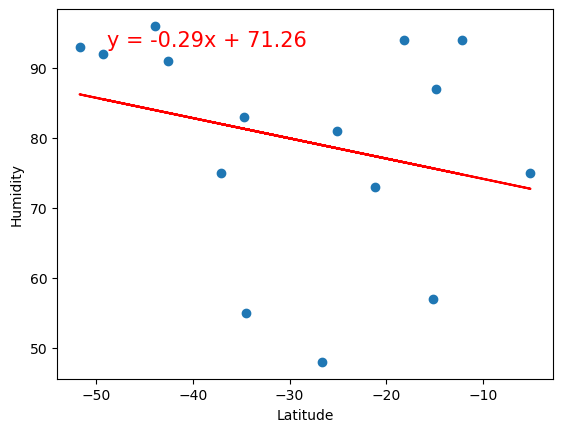

In [79]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
southern_hemi_equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity in both northern and southern zones of the earth. Humidity is not especially affected by the variable of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04333699048750247


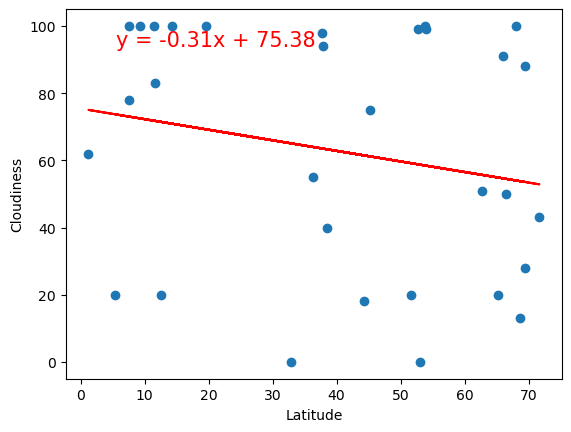

In [81]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
northern_hemi_equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r-value is: 0.315480838530729


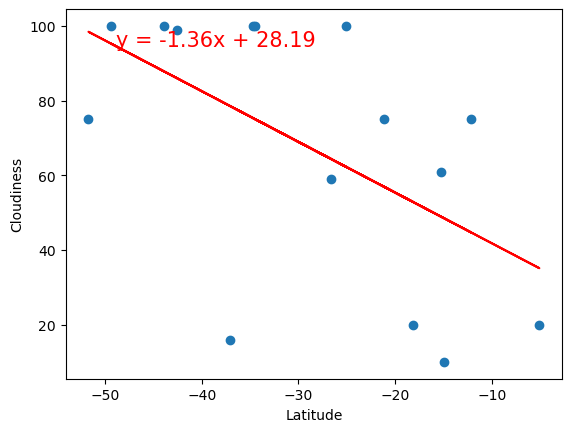

In [83]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
southern_hemi_equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** There is a moderate correlation between latitude and cloudiness, as the farther from the equator places are the more cloudy their climate appears to be.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 9.801955122714388e-06


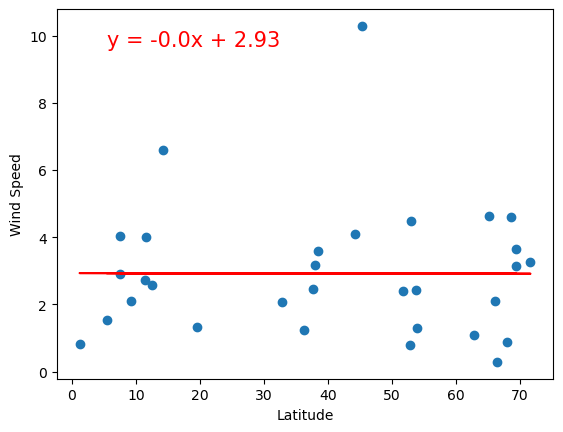

In [85]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
northern_hemi_equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r-value is: 0.04737937223105584


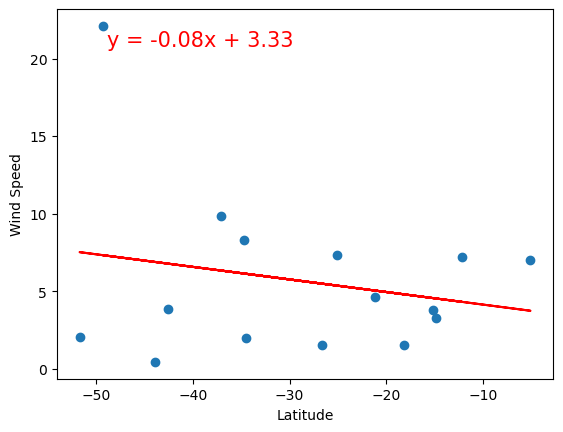

In [87]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
southern_hemi_equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There is no statistically significant correlation between latitude and wind speed across regions in both hemispheres.